In [1]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup

In [2]:
# This function slices the unwanted text (introduction, etc.) at the beginning of the txt file 
# It takes a string 'my_str', and delete everything before the specified 'sub' 
def slicer_front(my_str,sub):
  index=my_str.find(sub)
  if index !=-1 :
        return my_str[index:] 
  else :
        raise Exception('Sub string not found!')

In [3]:
# This function slices the unwanted text (introduction, etc.) at the end of the txt file 
def slicer_back(my_str,sub):
  index=my_str.find(sub)
  if index !=-1 :
        return my_str[:index] 
  else :
        raise Exception('Sub string not found!')

In [77]:
# write a function to check distribution of each 'poem' after the split 
def see_len_dist(corpus):
    get_len_dist = []
    for i in corpus:
        get_len_dist.append(len(i))
    ax = sns.distplot(get_len_dist)
        # further stuff
    return ax

In [163]:
# write a function to check distribution of 'very short item' after the split 
def see_short_len_dist(corpus):
    get_len_dist = []
    for i in corpus:
        get_len_dist.append(len(i))
    ax = sns.distplot([i for i in get_len_dist if i<300])
        # further stuff
    return ax

In [81]:
# writ a function to read in data from a url 
def get_soup(target_url):
    r = requests.get(target_url)
    soup = BeautifulSoup(r.text, "html.parser")
    return soup

### Read Data

Read in from local file: poetry collection "Collected Poems by Dylan Thomas" 

In [44]:
with open('DylanThomas.txt',"r") as f:
    DT_raw = f.read().split('\n\n\n')
len(DT_raw)

201

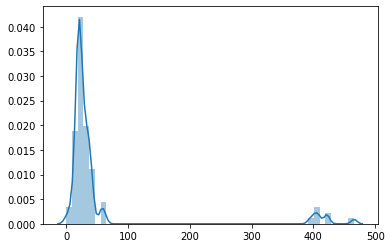

In [78]:
## Getting Rid of the Title 
see_short_len_dist(DT_raw)

We know from above the title length<200

In [151]:
DT_c = [i for i in DT_raw if len(i)>200]
len(DT_c)

111

Read in from website.

In [63]:
CP_raw = get_soup('https://raw.githubusercontent.com/tfavory/pmlg-poem-generator/master/model_training/corpus.txt')


In [67]:
CP = CP_raw.get_text().split('\n\n\n\n')
len(CP)

631

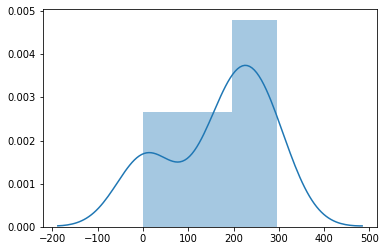

In [165]:
see_short_len_dist(CP)

In [153]:
CP_c = [i for i in CP if len(i)>200]
len(CP_c)

621

Read from the website: https://raw.githubusercontent.com/tfavory/pmlg-poem-generator/master/model_training/corpus.txt

Poetry Collection: Songs of Innocence and Songs of Experience

In [85]:
SE_raw = get_soup('http://www.gutenberg.org/files/1934/1934-0.txt')

In [154]:
# Clean preface, conclusion and titles
SE_txt = slicer_back(slicer_front(SE_raw.get_text(),'How sweet is the shepherd'),'***END OF THE PROJECT GUTENBERG') # Delete the preface and conclusion


In [155]:
# the title are all capitalized, get rid of capitalized words
# split the text into each poem
SE = []
for i in SE_txt.split('\r\n\r\n\r\n\r\n'):
    i_c = re.sub('[A-Z \d\W]+\r\n','', i)
    SE.append(i_c)
len(SE)

47

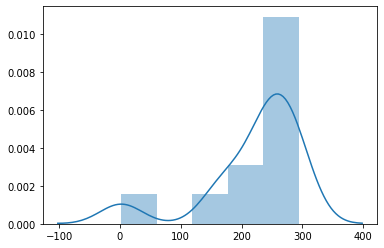

In [166]:
see_short_len_dist(SE)

In [168]:
SE_c = [i for i in SE if len(i)>100]
len(SE_c)

46

read from website: http://www.gutenberg.org/cache/epub/8789/pg8789.txt

Divine Comedy by Dante

In [127]:
DE_raw = get_soup('http://www.gutenberg.org/cache/epub/8789/pg8789.txt')

In [170]:
# Clean preface, conclusion and titles
DE_txt = slicer_back(slicer_front(DE_raw.get_text(),'IN the midway of this our'),'End of Project Gutenberg') # Delete the preface and conclusion


In [172]:
# the title are all capitalized, get rid of capitalized words
# split the text into each poem
DE = []
for i in DE_txt.split('\r\n\r\n\r\n'):
    i_c = re.sub('[A-Z \d\W]+\r\n','', i)
    DE.append(i_c)
len(DE)

36

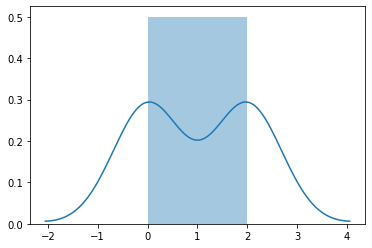

In [173]:
see_short_len_dist(DE)

In [149]:
DE_c = [i for i in DE_c if len(i)>10]
len(DE_c)

34

read from website: http://www.gutenberg.org/cache/epub/21700/pg21700.txt

Don Juan

In [174]:
DJ = get_soup('http://www.gutenberg.org/cache/epub/21700/pg21700.txt')

In [175]:
# Clean preface, conclusion and titles
DJ_txt = slicer_back(slicer_front(DJ.get_text(),'I want a hero: an uncommon want,'),'End of the Project Gutenberg EBook') # Delete the preface and conclusion



In [187]:
DJ = DJ_txt.split('\r\n\r\n')
len(DJ)

2044

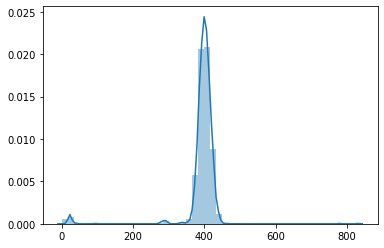

In [185]:
see_len_dist(DJ)

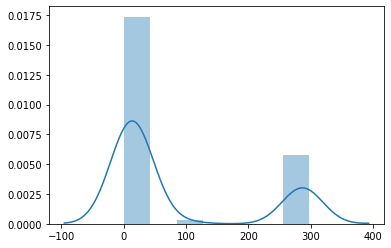

In [186]:
see_short_len_dist(DJ)

In [192]:
# append sentances
DJ_c = [i for i in DJ if len(i)> 50]
len(DJ_c)

1993

In [195]:
corpus = DT_c+ CP_c+ SE_c+ DE_c+ DJ_c

In [196]:
len(corpus)

2805